In [2]:
import anialtools as alt

import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Working directory for network training
nwdir = '/nh/nest/u/jsmith/scratch/Research/CCSD_Water_train/tfer/CCSD_Water_train/models_58R32_35A4-8/arch_search/'

# Directory to h5 files containing the energies
h5dir = '/nh/nest/u/jsmith/Research/multi_nettrainer/h5files/'

In [4]:
# Define input designer
aipt = alt.anitrainerinputdesigner()

# Setup network architechtures for each atomic symbol and add layers to the network
layer_dictsH = [{"nodes":16,"activation":9,"l2norm":1,"l2valu":  0.0001},
                {"nodes":16,"activation":9,"l2norm":1,"l2valu": 0.00001},
                {"nodes":16,"activation":9,"l2norm":1,"l2valu":0.00001}]
for l in layer_dictsH:
    aipt.add_layer("H",l)


layer_dictsC = [{"nodes":16,"activation":9,"l2norm":1,"l2valu":  0.0001},
                {"nodes":16,"activation":9,"l2norm":1,"l2valu": 0.00001},
                {"nodes":16,"activation":9,"l2norm":1,"l2valu":0.00001}]
for l in layer_dictsC:
    aipt.add_layer("C",l)

layer_dictsN = [{"nodes":16,"activation":9,"l2norm":1,"l2valu":  0.0001},
                {"nodes":16,"activation":9,"l2norm":1,"l2valu": 0.00001},
                {"nodes":16,"activation":9,"l2norm":1,"l2valu":0.00001}]
for l in layer_dictsN:
    aipt.add_layer("N",l)

layer_dictsO = [{"nodes":16,"activation":9,"l2norm":1,"l2valu":  0.0001},
                {"nodes":16,"activation":9,"l2norm":1,"l2valu": 0.00001},
                {"nodes":16,"activation":9,"l2norm":1,"l2valu":0.00001}]
for l in layer_dictsO:
    aipt.add_layer("O",l)

# Output the layer parameters
aipt.print_layer_parameters()

# Customize training parameters
aipt.set_parameter("sflparamsfile",'rHCNO-4.6R_16-3.1A_a4-8.params')
aipt.set_parameter("atomEnergyFile",'sae_linfit.dat')
aipt.set_parameter("tolr",40)

# Print all training parameters
aipt.print_training_parameters()

# Write the input file
aipt.write_input_file(nwdir+'inputtrain.ipt',384)

Species: H
  - {'nodes': 16, 'activation': 9, 'l2norm': 1, 'l2valu': 0.0001, 'type': 0}
  - {'nodes': 16, 'activation': 9, 'l2norm': 1, 'l2valu': 1e-05, 'type': 0}
  - {'nodes': 16, 'activation': 9, 'l2norm': 1, 'l2valu': 1e-05, 'type': 0}
Species: C
  - {'nodes': 16, 'activation': 9, 'l2norm': 1, 'l2valu': 0.0001, 'type': 0}
  - {'nodes': 16, 'activation': 9, 'l2norm': 1, 'l2valu': 1e-05, 'type': 0}
  - {'nodes': 16, 'activation': 9, 'l2norm': 1, 'l2valu': 1e-05, 'type': 0}
Species: N
  - {'nodes': 16, 'activation': 9, 'l2norm': 1, 'l2valu': 0.0001, 'type': 0}
  - {'nodes': 16, 'activation': 9, 'l2norm': 1, 'l2valu': 1e-05, 'type': 0}
  - {'nodes': 16, 'activation': 9, 'l2norm': 1, 'l2valu': 1e-05, 'type': 0}
Species: O
  - {'nodes': 16, 'activation': 9, 'l2norm': 1, 'l2valu': 0.0001, 'type': 0}
  - {'nodes': 16, 'activation': 9, 'l2norm': 1, 'l2valu': 1e-05, 'type': 0}
  - {'nodes': 16, 'activation': 9, 'l2norm': 1, 'l2valu': 1e-05, 'type': 0}
{'sflparamsfile': 'rHCNO-4.6R_16-3.1A_a4

 Train   Valid   Test 
[[12902  6457     0]
 [12984  6502     0]
 [12959  6375     0]
 [12877  6527     0]]
Training set built.
Training Ensemble...
  -Model 0 complete
  -Model 1 complete
  -Model 2 complete
  -Model 3 complete
Training Complete.
reading: /nh/nest/u/jsmith/scratch/Research/multi_nettrainer/model/train0/output.opt
reading: /nh/nest/u/jsmith/scratch/Research/multi_nettrainer/model/train1/output.opt
reading: /nh/nest/u/jsmith/scratch/Research/multi_nettrainer/model/train2/output.opt
reading: /nh/nest/u/jsmith/scratch/Research/multi_nettrainer/model/train3/output.opt
Mean time: 0.01458691163310962
Total time: 13.040699


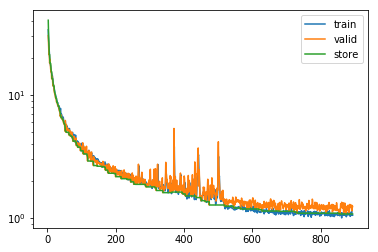

Mean time: 0.014790124429223743
Total time: 12.956149


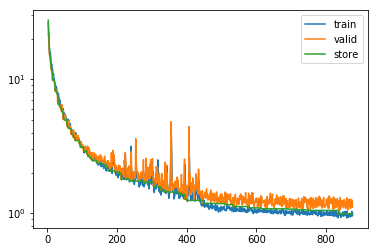

Mean time: 0.04046782517482518
Total time: 34.721394000000004


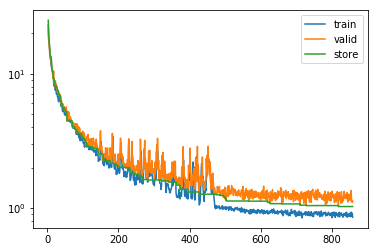

Mean time: 0.038891603448275865
Total time: 29.324269


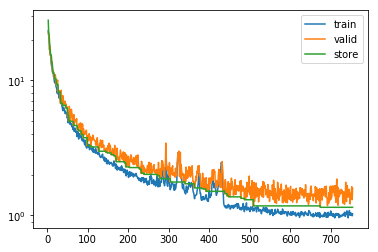

Final train errors: 0.98 +-0.074
Final valid errors: 1.06 +-0.059


In [5]:
# Declare dict of requred training files
netdict = {'iptfile':nwdir+'inputtrain.ipt', # input parameters file
           'cnstfile':nwdir+'rHCNO-4.6R_16-3.1A_a4-8.params', # AEV parameters file
           'saefile':nwdir+'sae_linfit.dat', # Single atom energy shift file (if this does not exist it is created via a linear fitting)
           'atomtyp':['H','C','N','O']} # Atomic species which are included in the training set

# Declare the trainer class
model = alt.alaniensembletrainer(nwdir,netdict,h5dir,4)

# Build a strided training cache for an ensemble
# split the data into 4 blocks, hold out 1 block for validation and 1 block for testing
# do not build the testset (this can be altered and will build a testing h5)
model.build_strided_training_cache(4,1,1,build_test=False)

# Declare GPUs to train on
gpus = [0,1]

# Train the ensemble on the give GPUs.
model.train_ensemble(gpus, True)

# Read outputs to get the training stats
info = model.get_train_stats()

# Make some plots with the training stats for each network trained
fE = np.zeros((2,len(info)),dtype=np.float64)
for idx,i in enumerate(info):
    print('Mean time:',np.array(i['RTIME']).mean())
    print('Total time:',np.array(i['RTIME']).sum())
    plt.semilogy(i['EPOCH'][2:],i['ERROR']['E (kcal/mol)'][2:,0],label='train',)
    plt.semilogy(i['EPOCH'][2:],i['ERROR']['E (kcal/mol)'][2:,1],label='valid') 
    plt.semilogy(i['EPOCH'][2:],i['ERROR']['E (kcal/mol)'][2:,2],label='store')
    plt.legend()
    plt.show()

    fE[0,idx] = i['ERROR']['E (kcal/mol)'][-1,0]
    fE[1,idx] = i['ERROR']['E (kcal/mol)'][-1,2]

# Print ensemble train and valiation errors
print('Final train errors:',"{0:.2f}".format(fE[0,:].mean()),'+-'+"{0:.3f}".format(fE[0,:].std()))
print('Final valid errors:',"{0:.2f}".format(fE[1,:].mean()),'+-'+"{0:.3f}".format(fE[1,:].std()))